In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!mkdir face_recognition/

mkdir: cannot create directory ‘face_recognition/’: File exists


In [18]:
%cd face_recognition

/content/drive/MyDrive/face_recognition


In [ ]:
!unzip GEO.zip 

Archive:  GEO.zip
   creating: GEO/
  inflating: GEO/1.jpg               
  inflating: GEO/10.jpg              
  inflating: GEO/100.jpg             
  inflating: GEO/101.jpg             
  inflating: GEO/102.jpg             
  inflating: GEO/103.jpg             
  inflating: GEO/104.jpg             
  inflating: GEO/105.jpg             
  inflating: GEO/106.jpg             
  inflating: GEO/107.jpg             
  inflating: GEO/108.jpg             
  inflating: GEO/109.jpg             
  inflating: GEO/11.jpg              
  inflating: GEO/110.jpg             
  inflating: GEO/111.jpg             
  inflating: GEO/112.jpg             
  inflating: GEO/113.jpg             
  inflating: GEO/114.jpg             
  inflating: GEO/115.jpg             
  inflating: GEO/116.jpg             
  inflating: GEO/117.jpg             
  inflating: GEO/118.jpg             
  inflating: GEO/119.jpg             
  inflating: GEO/12.jpg              
  inflating: GEO/120.jpg             
  inflating: G

In [ ]:
!unzip ABHIN.zip

Archive:  ABHIN.zip
   creating: ABHIN/
  inflating: ABHIN/1.jpg             
  inflating: ABHIN/10.jpg            
  inflating: ABHIN/100.jpg           
  inflating: ABHIN/101.jpg           
  inflating: ABHIN/102.jpg           
  inflating: ABHIN/103.jpg           
  inflating: ABHIN/104.jpg           
  inflating: ABHIN/105.jpg           
  inflating: ABHIN/106.jpg           
  inflating: ABHIN/107.jpg           
  inflating: ABHIN/108.jpg           
  inflating: ABHIN/109.jpg           
  inflating: ABHIN/11.jpg            
  inflating: ABHIN/110.jpg           
  inflating: ABHIN/111.jpg           
  inflating: ABHIN/112.jpg           
  inflating: ABHIN/113.jpg           
  inflating: ABHIN/114.jpg           
  inflating: ABHIN/115.jpg           
  inflating: ABHIN/116.jpg           
  inflating: ABHIN/117.jpg           
  inflating: ABHIN/118.jpg           
  inflating: ABHIN/119.jpg           
  inflating: ABHIN/12.jpg            
  inflating: ABHIN/120.jpg           
  inflatin

In [ ]:
!unzip unknown.zip

Archive:  unknown.zip
   creating: unknown/
  inflating: unknown/face_0.jpg      
  inflating: unknown/face_1.jpg      
  inflating: unknown/face_2.jpg      
  inflating: unknown/face_3.jpg      
  inflating: unknown/face_4.jpg      
  inflating: unknown/face_5.jpg      
  inflating: unknown/face_6.jpg      
  inflating: unknown/face_7.jpg      
  inflating: unknown/face_8.jpg      
  inflating: unknown/face_9.jpg      
  inflating: unknown/face_10.jpg     
  inflating: unknown/face_11.jpg     
  inflating: unknown/face_12.jpg     
  inflating: unknown/face_13.jpg     
  inflating: unknown/face_14.jpg     
  inflating: unknown/face_16.jpg     
  inflating: unknown/face_17.jpg     
  inflating: unknown/face_18.jpg     
  inflating: unknown/face_19.jpg     
  inflating: unknown/face_20.jpg     
  inflating: unknown/face_21.jpg     
  inflating: unknown/face_22.jpg     
  inflating: unknown/face_23.jpg     
  inflating: unknown/face_24.jpg     
  inflating: unknown/face_25.jpg     
  infl

In [ ]:
#!pip install split-folders
#import splitfolders
#splitfolders.ratio('data', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 1500 files [00:18, 80.49 files/s]


In [2]:
!pip3 install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.3 MB/s eta 0:00:00


In [3]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [5]:
img = cv.imread("/content/drive/MyDrive/face_recognition/data/Abhin/1.jpg")
# opencv BGR channel format and plt reads images as RGB channel format

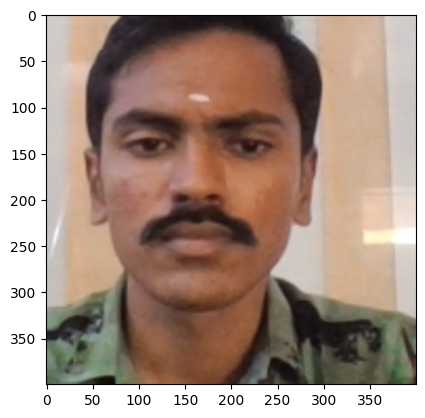

In [6]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB 

In [7]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 205ms/step


In [8]:
results

[{'box': [52, 36, 219, 287],
  'confidence': 0.9999990463256836,
  'keypoints': {'left_eye': (112, 140),
   'right_eye': (216, 141),
   'nose': (162, 188),
   'mouth_left': (115, 247),
   'mouth_right': (208, 248)}}]

In [9]:
x,y,w,h = results[0]['box']

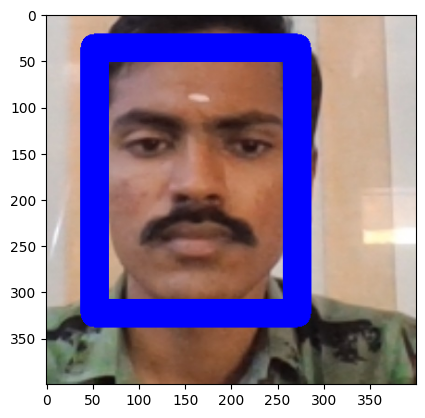

In [12]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 5)
plt.imshow(img)

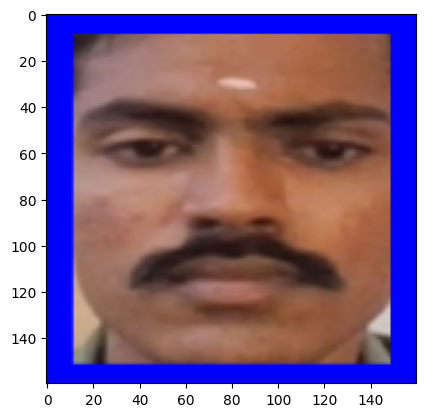

In [13]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160 
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [14]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [15]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [19]:
faceloading = FACELOADING("data")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 103ms/step


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 500
1/1 [==============================] - 0s 41ms/step
Loaded successfully: 484


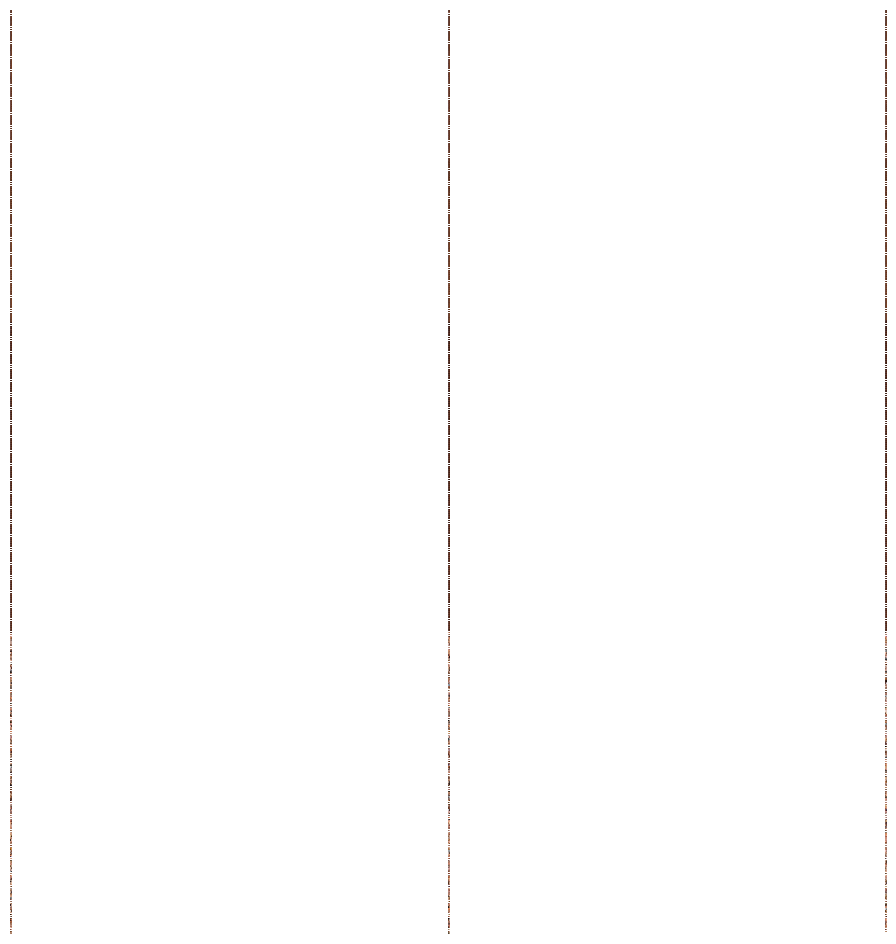

In [20]:
"""plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')"""

In [21]:
!pip3 install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=a43c10a051bca3ae10ee44cffcea5b564183994d801b3129ef8b75785ed936f6
  Stored in directory: /root/.cache/pip/wheels/73/5d/41/90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet


In [22]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [23]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 28ms/step


In [24]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '0')

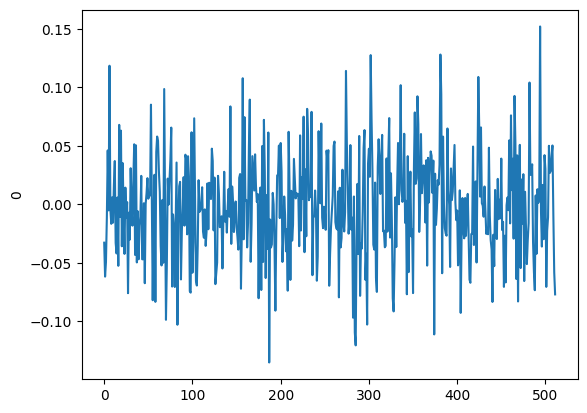

In [26]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [28]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [29]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [31]:
accuracy_score(Y_test,ypreds_test)

1.0

In [43]:
t_im = cv.imread("/content/drive/MyDrive/face_recognition/data/Unknown/face_0.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 33ms/step


In [44]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 29ms/step


In [45]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [46]:
encoder.inverse_transform(ypreds)

array(['Unknown'], dtype='<U7')

In [47]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)